# Hierarchical Clustering 

Given the size of the data, let's examine if the alternative (agglomerative) hierarchical clustering technique gives better metrics. 

In [46]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

In [31]:
df=pd.read_csv('../data/cluster_data.csv')

#gather the columns that we want 
X=df.iloc[:, 3:]

In [32]:
#scale data due to the size of some of the features compared to others. 
scaler=MinMaxScaler()
scaled_feats=scaler.fit_transform(X)

Lets now examine the dendrogram of various metrics and see if we can get an answer similar to before with KMeans. 

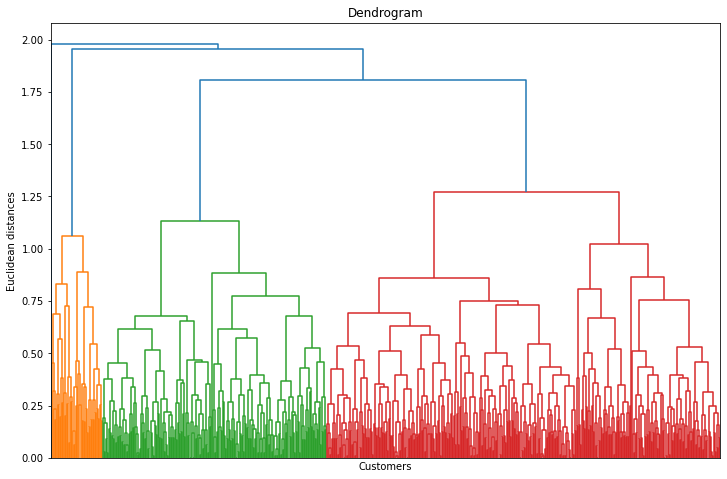

In [19]:
#Complete (max) metric 
plt.figure(figsize=(12,8))
dendrogram = sch.dendrogram(sch.linkage(scaled_feats, method = 'complete'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.xticks([])
plt.savefig('max_metric_dendrogram.jpg')
plt.show()

The max (complete) metric give us three clusters as in the KMeans notebook. The branches also have a long length, indicating large dissimilarity between the clusters. 

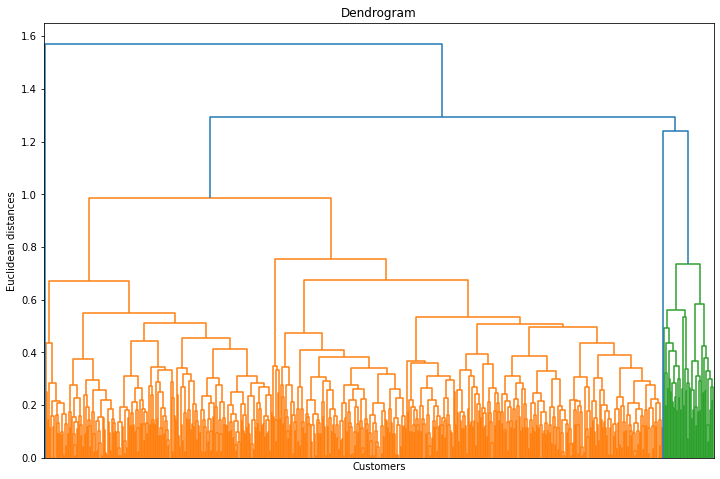

In [18]:
#weighted metric 
plt.figure(figsize=(12,8))
dendrogram = sch.dendrogram(sch.linkage(scaled_feats, method = 'weighted'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.xticks([])
plt.ylabel('Euclidean distances')
plt.show()

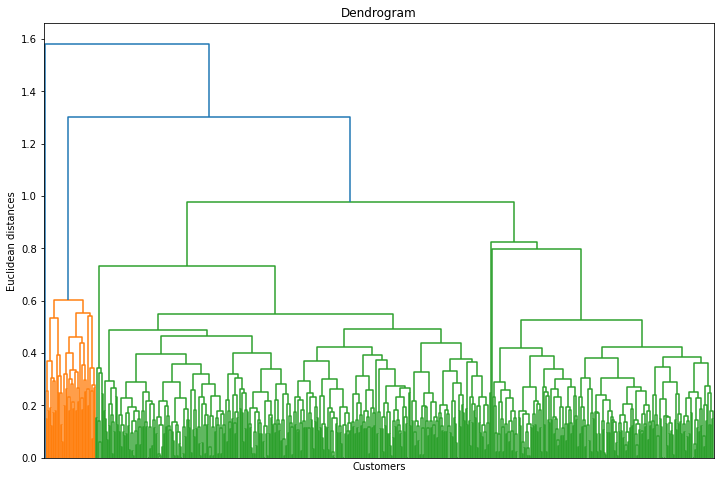

In [17]:
#Average metric 
plt.figure(figsize=(12,8))
dendrogram = sch.dendrogram(sch.linkage(scaled_feats, method = 'average'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.xticks([])
plt.ylabel('Euclidean distances')
plt.show()

Interesting that the average and weighted metrics only gave two clusters, potentially because of the non squared term. Lets see what happens with the Ward method. 

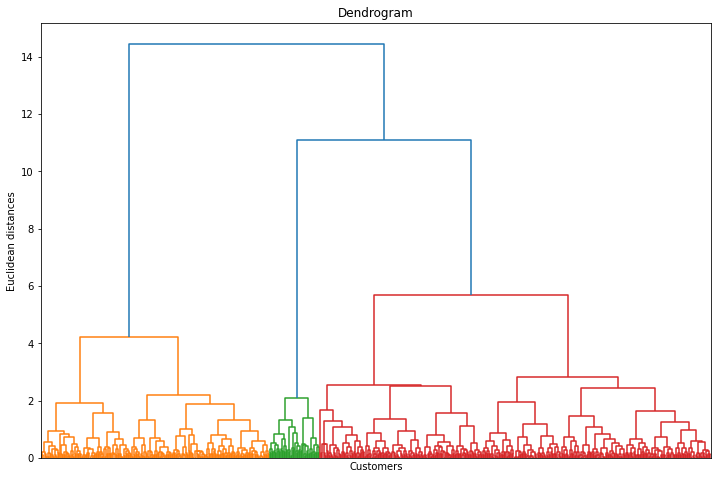

In [16]:
#Ward metric 
plt.figure(figsize=(12,8))
dendrogram = sch.dendrogram(sch.linkage(scaled_feats, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.xticks([])
plt.savefig('ward_metric_dendrogram.jpg')
plt.show()

The Ward method looks really good. We get three clusters and the branches are relatively long indicating nice cluster dissimilarity. We will use this metric in the agglomerative clustering method as well as three clusters (the same as in the KMeans notebook). 

In [33]:
#use agglomerative modelling 
from sklearn.cluster import AgglomerativeClustering 
hier_clust = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

In [34]:
#get the prediction
y=hier_clust.fit_predict(X)

In [43]:
#Calculate the silhouette_score
from sklearn.metrics import silhouette_score
hier_score= silhouette_score(scaled_feats,y)
print('The silhouette score for Hierarchal clustering is {0:.4f}'.format(hier_score))

The silhouette score for Hierarchal clustering is 0.1796


In [48]:
#the silhouette samples, the means of these samples will give the above score
silhouette_samples(scaled_feats, y)

0.17955259840853882

## Cluster Analysis 
Let's take a deeper dive into what each hierarchical cluster contains. This should allow us to understand each cluster further. 

In [35]:
data_hc=X.copy()
data_hc['prediction_cluster']=y

In [38]:
data_hc.prediction_cluster.value_counts()

2    390
0    243
1     27
Name: prediction_cluster, dtype: int64

In [37]:
data_hc.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made', 'interactions',
       'avg_credit_per_card', 'avg_credit_per_interaction',
       'prediction_cluster'],
      dtype='object')

In [39]:
features=['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made', 'interactions',
       'avg_credit_per_card', 'avg_credit_per_interaction']

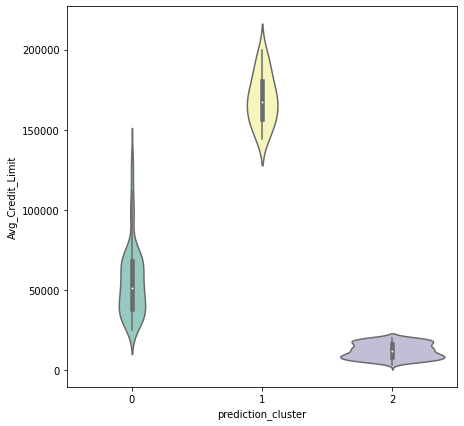

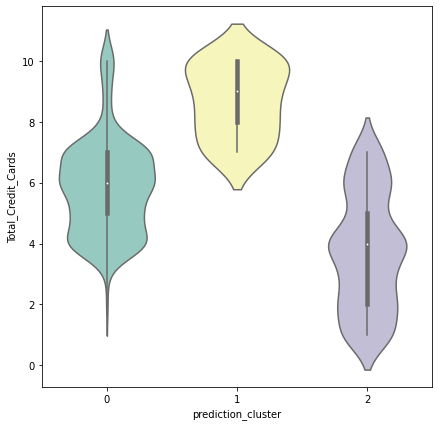

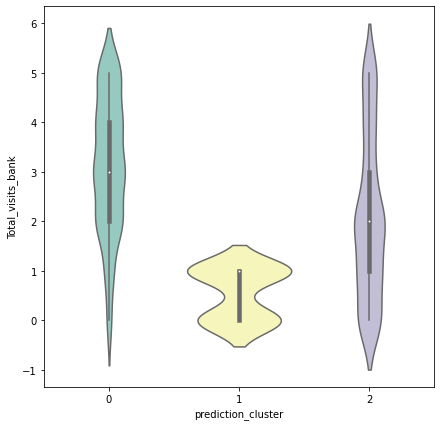

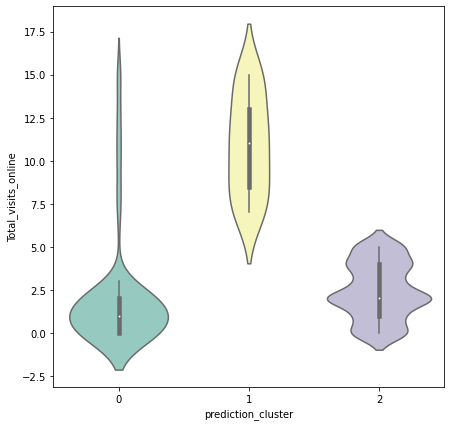

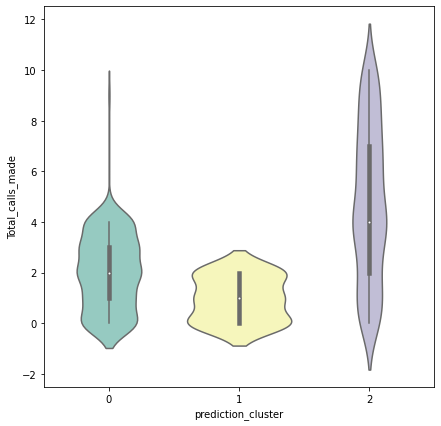

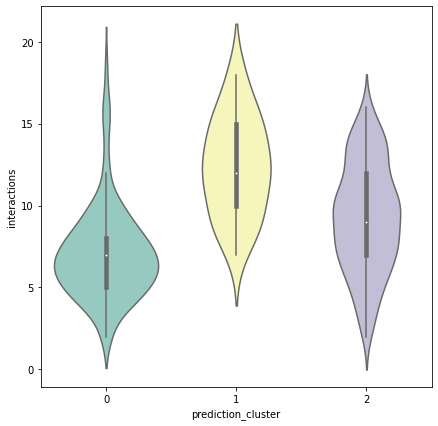

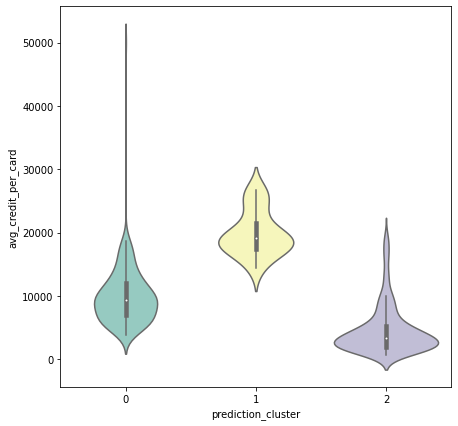

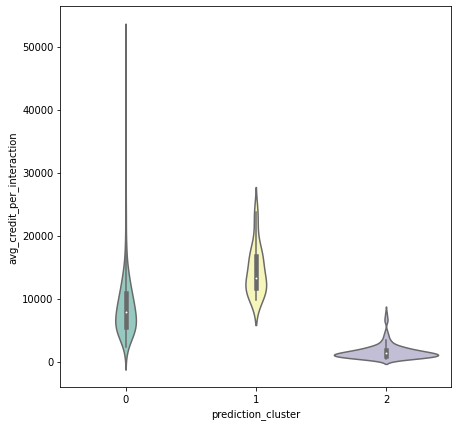

In [42]:
#plot violin plots to get a better sense of the distributions for 
#where each cluster is most likely occuring 
for feat in features: 
    plt.figure(figsize=(7,7))
    sns.violinplot(x='prediction_cluster', y=feat, data=data_hc, palette='Set3')
    plt.show()
    

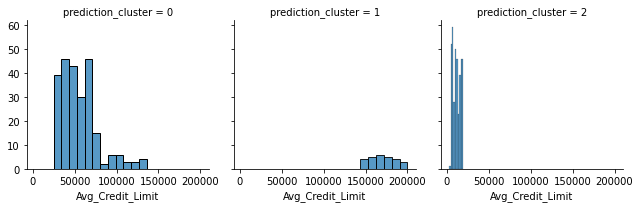

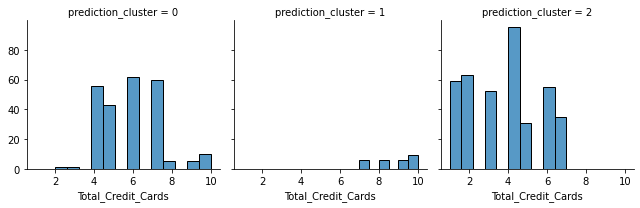

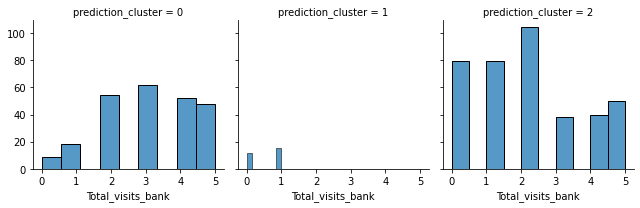

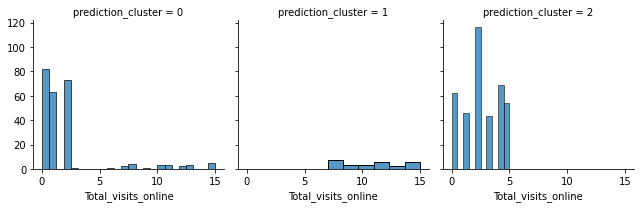

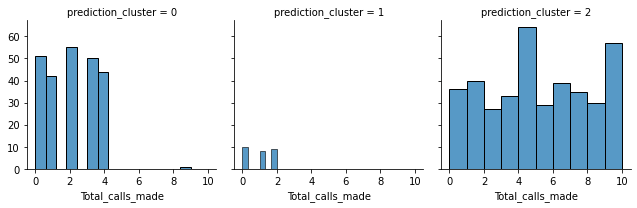

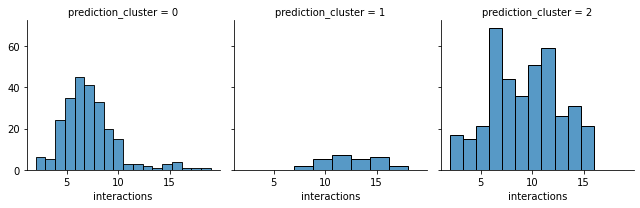

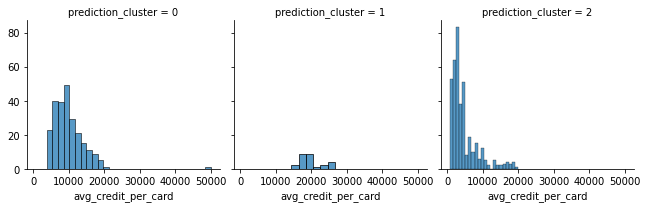

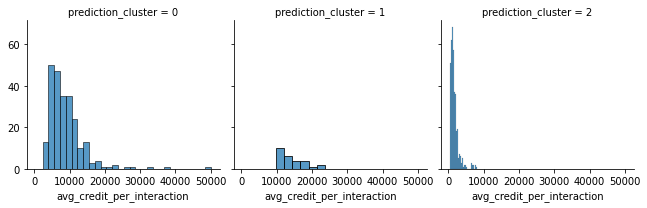

In [45]:
for feat in features:
    g = sns.FacetGrid(data_hc, col = 'prediction_cluster')
    g.map(sns.histplot, feat)

Summary of what we are seeing from the violin plots and histograms: 

- Cluster 0: 
    - Had the second most average credit limit where most customers have a high probability of landing somwhere between the 50000 and 100000 average credit range. High probability of online visits online to be between 0 and 2.5. Low probability elsewhere it looks like. Good amount of interactions where the probability of each customer landing is along the median. This is the second largest cluster. 
- Cluster 1: 
    - Seem to have the higher overall credit limit,more total visits online with a higher probability of more calls. More overall interactions with again higher interaction probability. Furthermore, this cluster seems to have more customers with higher credit cards, with a majority of them having a high chance of having 9. The smalles cluster with the high credit limits. 
- Cluster 2: 
   - The users have the least avg credit limit and make the least amount of online visits (with a high chance of making 2.5 visits online).Total visits to the bank seems to be spread out with the second highest median. This cluster seems to have the highest chance of making a phone call to the bank. This is the largest cluster. 

__Final Analysis of Customer Clusters using Hierarchical Clustering:__

- __Cluster 0:__ This cluster is in between the next two clusters on average. The credit limits seem to indicate that these are middle class customers that have a good amount of interactions with the bank. This would indicate that these are responsible customers from a business standpoint. Depending on the length of their time with the bank, it could be worthwhile to extend their potential lines of credit to hopefully increase their credit spending activity, resulting in more business revenue for the bank. 

- __Cluster 1:__ Given the high credit limits of these customers along with the most interactions, it would suggest that these customers are high quality customers. This may indicate that not only do these customers have a higher average income but are also more responsible. This would suggest that these customers can be very profitable from an advertisement standpoint.

- __Cluster 2:__ Since this cluster has the most customers within it, many of the metrics are highest here. Given that these customers tend to have lower average credit limits as well as lower number of credit cards, this may signal that they have a lower income or have developing credit. It may be worthwhile business wise to interact with these customers to potentially reduce churn and potential credit default. This can be done via check in emails, calls, amd account reminders when visiting online. 